<a href="https://colab.research.google.com/github/JamesEckhartJr/Quantum-Hardware-Projects/blob/main/Quantum_Logic_(X_Gate)%20w/%20graphical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json  # For working with JSON (JavaScript Object Notation) data
import requests  # For making HTTP requests to the Quokka

# Suppressing warnings (optional)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

# Create a simple function to wrap your quantum program up, send to Quokka, and extract results
def send_to_the_quokka(circuit, my_quokka='theq-ae31b1', count=1):

  # the complete listening address
  request_http = 'http://{}.quokkacomputing.com/qsim/qasm'.format(my_quokka)

  # create data to wrap in JSON object to send to Quokka
  data = {
    'script': circuit,
    'count': count
    }

  result = requests.post(request_http, json=data, verify=False) # send to Quokka and record results
  json_obj = json.loads(result.content) # convert to dictionary

  # Return the list of all results, not just the first one
  # Assuming 'c' is the classical register measurements and it returns a list of lists
  return [''.join(map(str, c_reg)) for c_reg in json_obj['result']['c']]

  # QASM is text based, so we'll use strings here in Python

# Every QASM files starts the same

program = """
OPENQASM 2.0;
"""

# Next, we specify the number of qubits using the command "qreg q[  ];"

program += """
qreg q[1];
"""

# Finally, the initialization is complete by specifying the classical
# registers where the results of measurement are stored
# this is done using "creg c[  ];"

program += """
creg c[1];
"""

# To read a qubit, we use "measure q[ ] -> c[ ]"
# This QASM command says measure a qubit and store the bit value
# in a classical register

program += """
measure q[0] -> c[0];
"""

# The original call to send_to_the_quokka(program) will now return a list of single '0' strings.
# The result of this specific call is not directly used for plotting the distribution
# as it was initially set to count=1 implicitly.
# However, the function is now ready to take a 'count' argument for the next step.
# For consistency with the original notebook, I will keep this line, but it will implicitly use count=1.
# If a distribution is desired, a new call with a higher count will be made in the next generated cell.
send_to_the_quokka(program)

# Set up our program as before

program = """
OPENQASM 2.0;
qreg q[1];
creg c[1];
"""

# To apply a quantum instruction, or "gate", use the pattern "gate q[ ];"
# We want to apply NOT, which is "x" in the QASM language

program += """
x q[0];
"""

# Finally, read the qubit and execute the program

program += """
measure q[0] -> c[0];
"""

send_to_the_quokka(program)

'1'

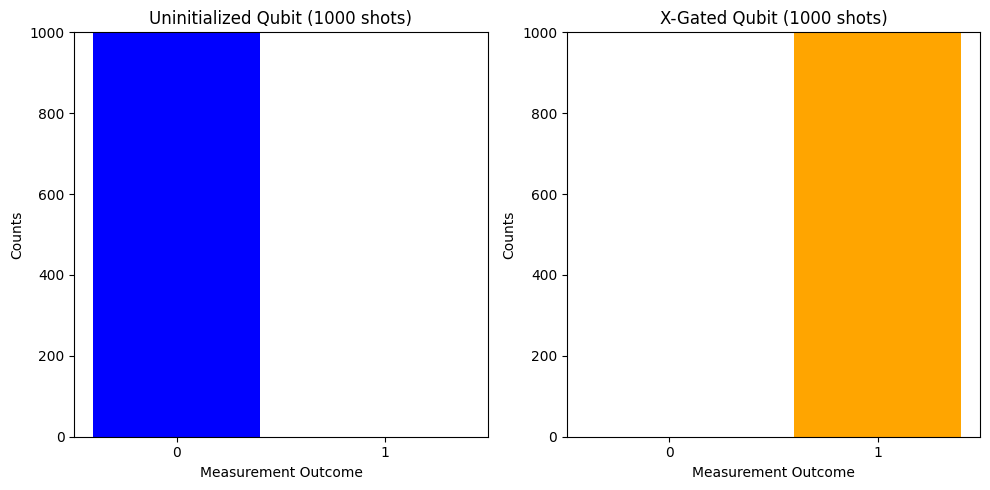

In [2]:
import json
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# Create a simple function to wrap your quantum program up, send to Quokka, and extract results
# This function definition is included here to resolve a NameError if the preceding cell was not executed.
# In a typical notebook workflow, you would ensure the cell defining this function is run first.
def send_to_the_quokka(circuit, my_quokka='theq-ae31b1', count=1):
  request_http = 'http://{}.quokkacomputing.com/qsim/qasm'.format(my_quokka)
  data = {
    'script': circuit,
    'count': count
    }
  result = requests.post(request_http, json=data, verify=False)
  json_obj = json.loads(result.content)
  return [''.join(map(str, c_reg)) for c_reg in json_obj['result']['c']]

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Number of shots for the simulation
NUM_SHOTS = 1000

# --- Simulation for the uninitialized qubit (should mostly be '0') ---

# Program for an uninitialized qubit, just measured
program_uninitialized = """
OPENQASM 2.0;
qreg q[1];
creg c[1];
measure q[0] -> c[0];
"""

# Send to Quokka with multiple shots
results_uninitialized = send_to_the_quokka(program_uninitialized, count=NUM_SHOTS)

# Count the occurrences of '0' and '1'
counts_uninitialized = {
    '0': results_uninitialized.count('0'),
    '1': results_uninitialized.count('1')
}

# --- Simulation for the X-gated qubit (should mostly be '1') ---

# Program for a qubit with an X gate, then measured
program_x_gate = """
OPENQASM 2.0;
qreg q[1];
creg c[1];
x q[0];
measure q[0] -> c[0];
"""

# Send to Quokka with multiple shots
results_x_gate = send_to_the_quokka(program_x_gate, count=NUM_SHOTS)

# Count the occurrences of '0' and '1'
counts_x_gate = {
    '0': results_x_gate.count('0'),
    '1': results_x_gate.count('1')
}

# --- Plotting the results ---

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for uninitialized qubit
axes[0].bar(counts_uninitialized.keys(), counts_uninitialized.values(), color=['blue', 'orange'])
axes[0].set_title(f'Uninitialized Qubit ({NUM_SHOTS} shots)')
axes[0].set_xlabel('Measurement Outcome')
axes[0].set_ylabel('Counts')
axes[0].set_ylim(0, NUM_SHOTS)

# Plot for X-gated qubit
axes[1].bar(counts_x_gate.keys(), counts_x_gate.values(), color=['blue', 'orange'])
axes[1].set_title(f'X-Gated Qubit ({NUM_SHOTS} shots)')
axes[1].set_xlabel('Measurement Outcome')
axes[1].set_ylabel('Counts')
axes[1].set_ylim(0, NUM_SHOTS)

plt.tight_layout()
plt.show()